In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.5 MB/s eta 0:00:00


In [3]:
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
df=pd.read_csv('/content/PUBG_Game_Prediction_data.csv')

In [23]:
df.shape

(869572, 29)

In [24]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [7]:
print("hello")

hello


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869572 entries, 0 to 869571
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               869572 non-null  object 
 1   groupId          869572 non-null  object 
 2   matchId          869572 non-null  object 
 3   assists          869572 non-null  int64  
 4   boosts           869572 non-null  int64  
 5   damageDealt      869572 non-null  float64
 6   DBNOs            869572 non-null  int64  
 7   headshotKills    869572 non-null  int64  
 8   heals            869572 non-null  int64  
 9   killPlace        869572 non-null  int64  
 10  killPoints       869572 non-null  int64  
 11  kills            869572 non-null  int64  
 12  killStreaks      869572 non-null  int64  
 13  longestKill      869572 non-null  float64
 14  matchDuration    869571 non-null  float64
 15  matchType        869571 non-null  object 
 16  maxPlace         869571 non-null  floa

In [26]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [27]:
df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
869571,81ba3b10a3e6d4,3ff68280cc04fb,d6d9d426d44ab7,0,0,95.83,0,0,0,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.drop(869571,inplace=True)

In [29]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [30]:
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')


In [31]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444,18
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400,22
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755,22
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667,22
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875,19


In [34]:
df["playersJoined"].median()

19.0

In [18]:
df.shape

(91906, 30)

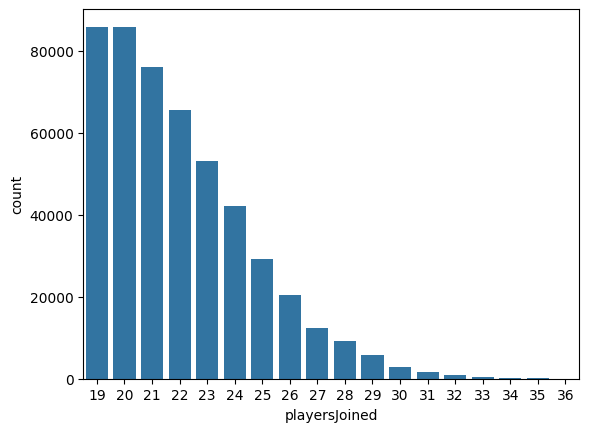

In [41]:
sns.countplot(data=df[df['playersJoined'] >= 19], x='playersJoined')
plt.show()

analysis of data


In [42]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined'],
      dtype='object')

In [43]:
df["totaldistance"]=df['swimDistance']+df['walkDistance']+df['rideDistance']
df["killswithoutmoving"]=((df['kills']>0)&(df['totaldistance']==0))

In [45]:
df[df["killswithoutmoving"]==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totaldistance,killswithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0.0,0.0,0.0,8.0,0.0,0.8571,13,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0.0,0.0,0.0,22.0,0.0,0.6000,10,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0.0,0.0,0.0,13.0,0.0,0.8947,7,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0.0,0.0,0.0,7.0,1500.0,0.0000,16,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0.0,0.0,0.0,10.0,0.0,0.3000,10,0.0,True


In [47]:
df[df["killswithoutmoving"]==True].shape

(314, 32)

In [49]:
df.drop(df[df['killswithoutmoving'] == True].index , inplace = True)

In [50]:
df[df['roadKills']>5].shape


(14, 32)

In [51]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

<Axes: xlabel='kills', ylabel='count'>

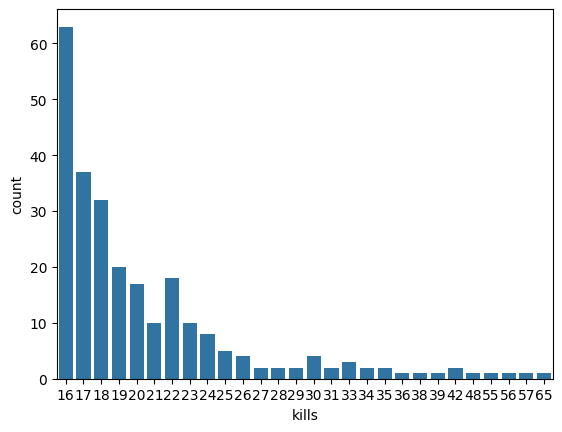

In [53]:
sns.countplot(data=df[df["kills"]>15],x='kills')

In [54]:
df[df["kills"]>20].shape

(84, 32)

In [55]:
df.drop(df[df['kills'] > 20].index, inplace = True)

In [56]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

<Axes: xlabel='headshot_rate', ylabel='Density'>

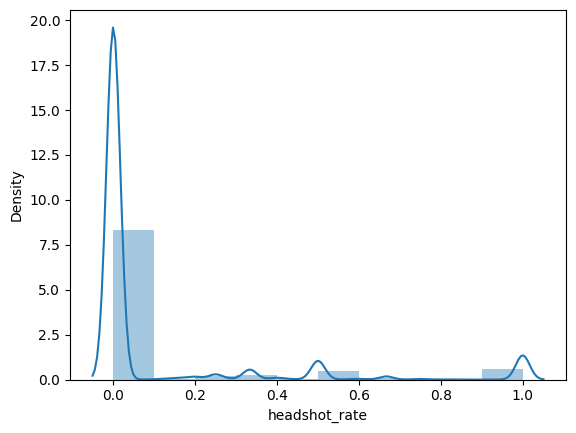

In [57]:
sns.distplot(df['headshot_rate'], bins =10)

In [59]:

df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(14, 33)

In [58]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

<Axes: xlabel='longestKill', ylabel='Density'>

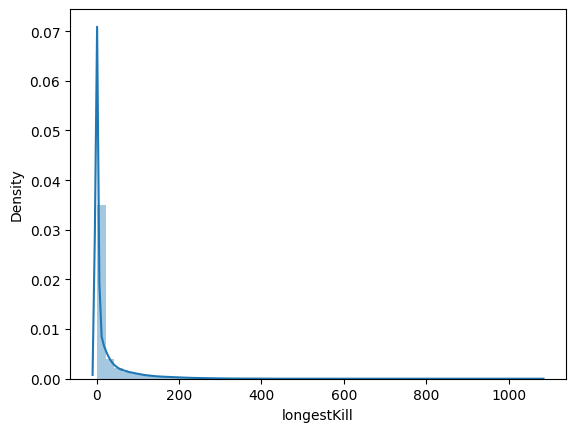

In [60]:
sns.distplot(df["longestKill"],bins=50)

In [61]:

df[df['longestKill']>=500].shape

(330, 33)

In [62]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

<Axes: xlabel='weaponsAcquired', ylabel='Density'>

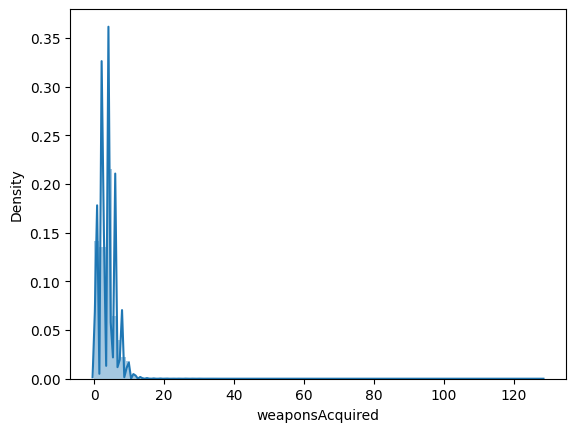

In [63]:
sns.distplot(df['weaponsAcquired'], bins=100)

In [64]:

df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

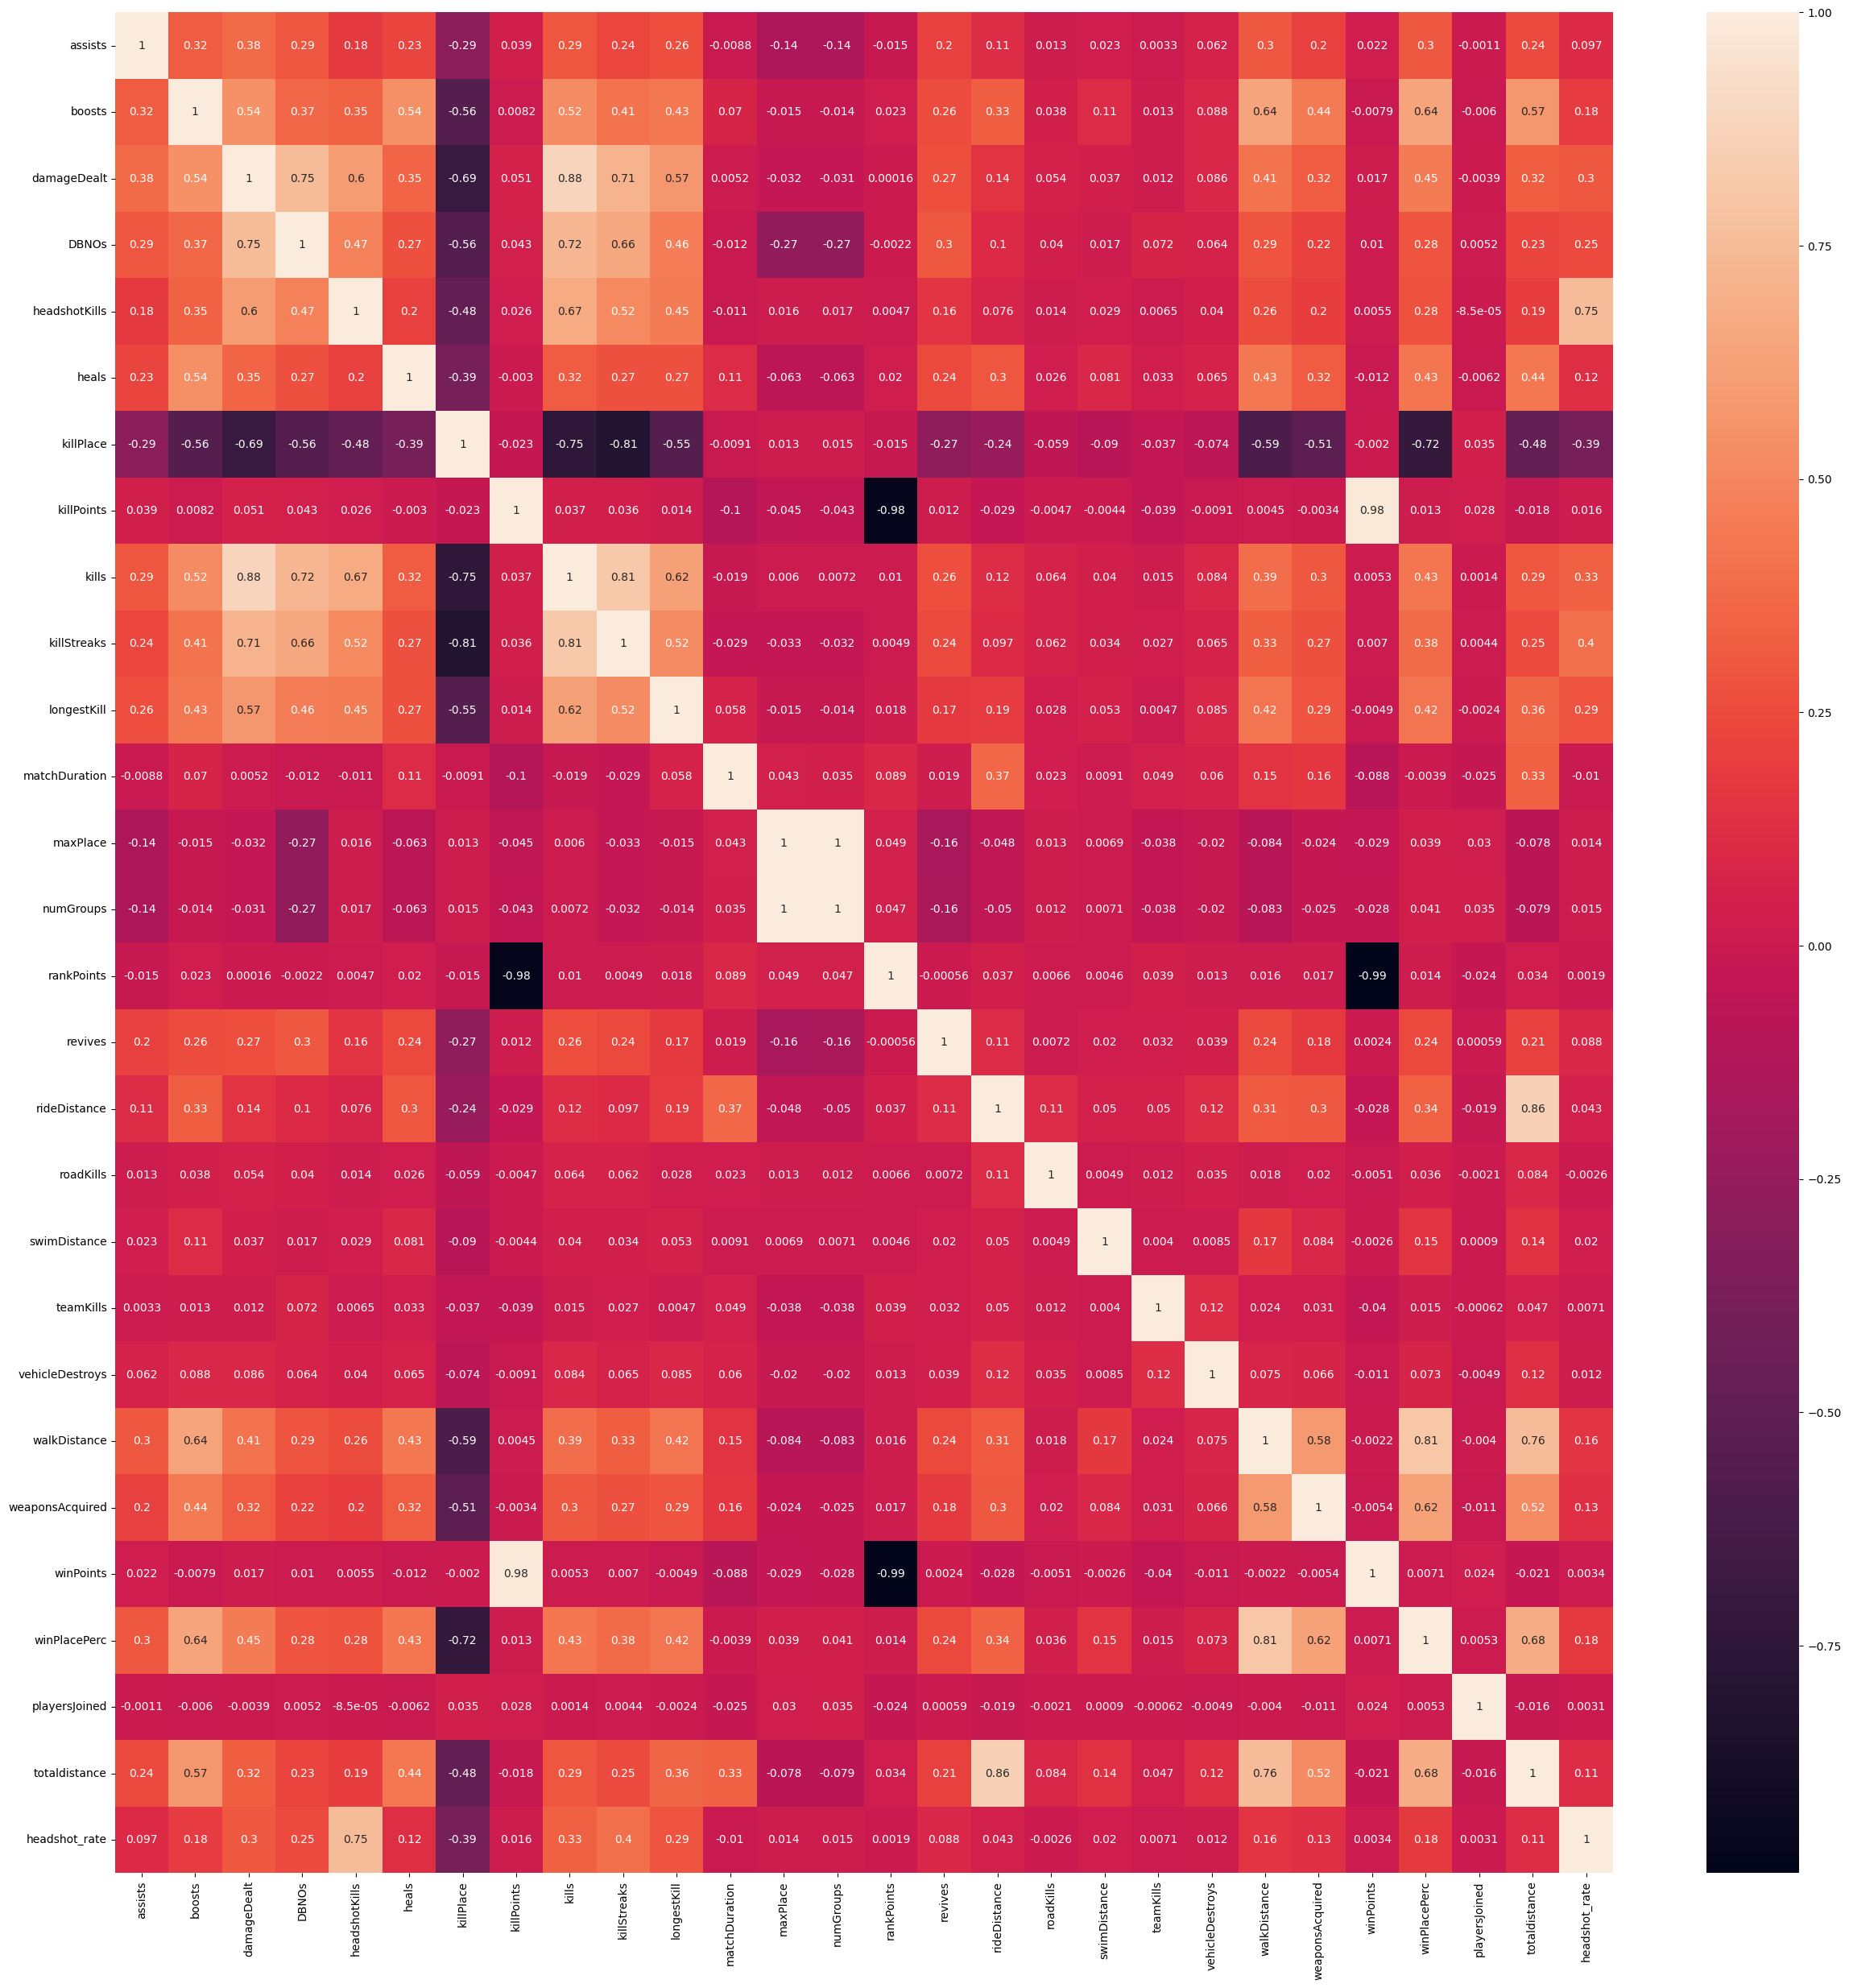

In [66]:
plt.figure(figsize=[30,30])
numeric_df = df.select_dtypes(include=['number'])


sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

feature engineering


In [67]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [68]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [69]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance',
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [70]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totaldistance,killswithoutmoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26.0,-1.0,0.0,...,244.8000,False,0.0,0.00,0.0000,2822.96,131670.92,244.8000,0,0.0
1,0,0,57,0,0,0.00,squad-fpp,25.0,1484.0,0.0,...,1445.0445,False,0.0,0.00,9218.3466,2620.28,179086.06,1445.0445,0,0.0
2,0,0,47,0,0,0.00,duo,47.0,1491.0,0.0,...,161.8000,False,0.0,0.00,6853.0400,5039.00,132828.04,161.8000,0,1.0
3,0,0,75,0,0,0.00,squad-fpp,30.0,1408.0,0.0,...,202.7000,False,0.0,0.00,3315.6620,3124.18,144720.08,202.7000,0,0.0
4,0,0,45,0,1,58.53,solo-fpp,95.0,1560.0,0.0,...,49.7500,False,0.0,100.81,10081.0000,9778.57,143553.44,49.7500,0,0.0


handling categorical data

In [99]:

x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [91]:
features=x.columns

In [100]:

x = pd.get_dummies(x, columns = ['matchType', 'killswithoutmoving'])

In [101]:
features=x.columns

In [74]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))


In [75]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [76]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(607225, 40) (607225,)
(260240, 40) (260240,)


In [77]:
import catboost as cd

In [86]:
train_dataset=cb.Pool(xtrain,ytrain)
test_datset=cb.Pool(xtrain,ytrain)

In [85]:
model=cb.CatBoostRegressor(loss_function="RMSE")

In [81]:
grid = {'iterations': [100, 150],
       'learning_rate': [0.03, 0.1],
       'depth': [2, 4, 6, 8]}

In [88]:
model.grid_search(grid,train_dataset)

0:	learn: 0.5484028	test: 0.5488781	best: 0.5488781 (0)	total: 327ms	remaining: 32.4s
1:	learn: 0.5335674	test: 0.5340171	best: 0.5340171 (1)	total: 460ms	remaining: 22.6s
2:	learn: 0.5191831	test: 0.5196089	best: 0.5196089 (2)	total: 595ms	remaining: 19.2s
3:	learn: 0.5052667	test: 0.5056643	best: 0.5056643 (3)	total: 704ms	remaining: 16.9s
4:	learn: 0.4917844	test: 0.4921548	best: 0.4921548 (4)	total: 827ms	remaining: 15.7s
5:	learn: 0.4787450	test: 0.4790910	best: 0.4790910 (5)	total: 939ms	remaining: 14.7s
6:	learn: 0.4661322	test: 0.4664479	best: 0.4664479 (6)	total: 1.06s	remaining: 14.1s
7:	learn: 0.4539343	test: 0.4542314	best: 0.4542314 (7)	total: 1.17s	remaining: 13.4s
8:	learn: 0.4421484	test: 0.4424263	best: 0.4424263 (8)	total: 1.33s	remaining: 13.5s
9:	learn: 0.4307435	test: 0.4310022	best: 0.4310022 (9)	total: 1.5s	remaining: 13.5s
10:	learn: 0.4197078	test: 0.4199460	best: 0.4199460 (10)	total: 1.6s	remaining: 12.9s
11:	learn: 0.4090446	test: 0.4092668	best: 0.4092668 (

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [102]:
f1=pd.DataFrame()
f1["Features"]=features
f1["importance"]=model.feature_importances_
f1

,Features,importance
0,DBNOs,0.792949
1,headshotKills,0.000000
2,killPlace,39.658737
3,killPoints,0.005793
4,killStreaks,5.254833
5,longestKill,2.793484
6,numGroups,3.890972
7,rankPoints,0.129252
8,roadKills,0.033852
9,teamKills,0.054581


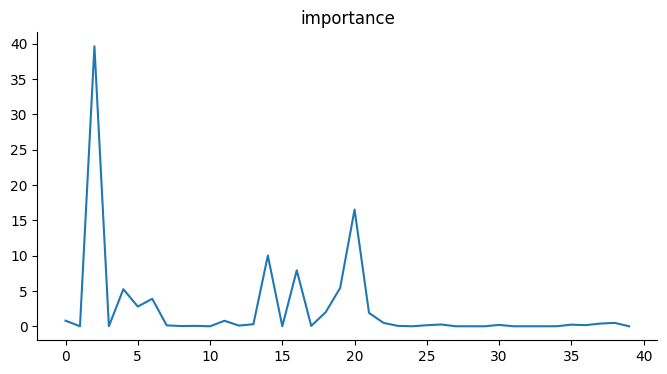

In [103]:


from matplotlib import pyplot as plt
f1['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

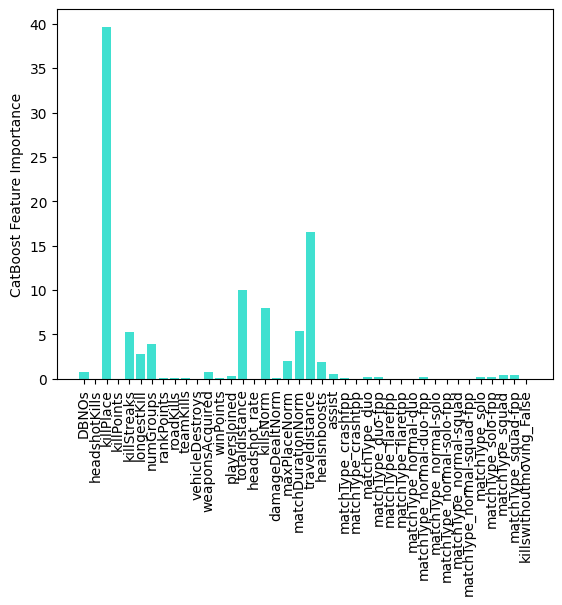

In [107]:
plt.bar(f1.Features, f1.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

In [108]:
pred = model.predict(xtest)

In [109]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.09
R2: 0.92
